In [1]:
import os
import re
import csv
import textract
import numpy as np
import pandas as pd
import seaborn as sns
from docx import Document
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

folders=[r"C:\Users\Asus\Downloads\Resumes-20211103T133301Z-001.zip (Unzipped Files)\Resumes-20211103T133301Z-001.zip (Unzipped Files)\Resumes\Peoplesoft resumes",
        r"C:\Users\Asus\Downloads\Resumes-20211103T133301Z-001.zip (Unzipped Files)\Resumes-20211103T133301Z-001.zip (Unzipped Files)\Resumes\React js developer",
        r"C:\Users\Asus\Downloads\Resumes-20211103T133301Z-001.zip (Unzipped Files)\Resumes-20211103T133301Z-001.zip (Unzipped Files)\Resumes\SQL Developer Lightning insight",
        r"C:\Users\Asus\Downloads\Resumes-20211103T133301Z-001.zip (Unzipped Files)\Resumes-20211103T133301Z-001.zip (Unzipped Files)\Resumes\workday resumes"]
base_path = os.getcwd()    #current working dir
for folder in folders:   #to check if above mentioned folders exists 
    if os.path.exists(folder):
        print(f"folder exists: {folder}")
    else:
        print(f"Folder doesnot exists: {folder}")

folder exists: C:\Users\Asus\Downloads\Resumes-20211103T133301Z-001.zip (Unzipped Files)\Resumes-20211103T133301Z-001.zip (Unzipped Files)\Resumes\Peoplesoft resumes
folder exists: C:\Users\Asus\Downloads\Resumes-20211103T133301Z-001.zip (Unzipped Files)\Resumes-20211103T133301Z-001.zip (Unzipped Files)\Resumes\React js developer
folder exists: C:\Users\Asus\Downloads\Resumes-20211103T133301Z-001.zip (Unzipped Files)\Resumes-20211103T133301Z-001.zip (Unzipped Files)\Resumes\SQL Developer Lightning insight
folder exists: C:\Users\Asus\Downloads\Resumes-20211103T133301Z-001.zip (Unzipped Files)\Resumes-20211103T133301Z-001.zip (Unzipped Files)\Resumes\workday resumes


In [2]:
def listing_files(folders):  #for listing of all files present in the folder
    for folder in folders:
        for file_name in os.listdir(folder):
            file_path=os.path.join(folder,file_name)
            print(f"found file: {file_path}")

In [3]:
listing_files(folders)

found file: C:\Users\Asus\Downloads\Resumes-20211103T133301Z-001.zip (Unzipped Files)\Resumes-20211103T133301Z-001.zip (Unzipped Files)\Resumes\Peoplesoft resumes\Peoplesoft Admin_AnubhavSingh.docx
found file: C:\Users\Asus\Downloads\Resumes-20211103T133301Z-001.zip (Unzipped Files)\Resumes-20211103T133301Z-001.zip (Unzipped Files)\Resumes\Peoplesoft resumes\Peoplesoft Admin_G Ananda Rayudu.doc
found file: C:\Users\Asus\Downloads\Resumes-20211103T133301Z-001.zip (Unzipped Files)\Resumes-20211103T133301Z-001.zip (Unzipped Files)\Resumes\Peoplesoft resumes\Peoplesoft Admin_Gangareddy.doc
found file: C:\Users\Asus\Downloads\Resumes-20211103T133301Z-001.zip (Unzipped Files)\Resumes-20211103T133301Z-001.zip (Unzipped Files)\Resumes\Peoplesoft resumes\Peoplesoft Admin_Murali.docx
found file: C:\Users\Asus\Downloads\Resumes-20211103T133301Z-001.zip (Unzipped Files)\Resumes-20211103T133301Z-001.zip (Unzipped Files)\Resumes\Peoplesoft resumes\Peoplesoft Admin_Priyanka Ramadoss.doc
found file: C

In [4]:
import docx2txt
import PyPDF2
import win32com.client

# to extract text from .docx and .pdf files
def extract_text_from_docx(file_path):
    try:
        return docx2txt.process(file_path)
    except Exception as e:
        print(f"Error reading DOCX file {file_path}: {e}")
        return ""


def extract_text_from_pdf(file_path):
    try:
        text = ""
        with open(file_path, "rb") as pdf_file:
            reader = PyPDF2.PdfReader(pdf_file)  #read the pdf file
            for page in reader.pages:
                text += page.extract_text() #text extraction from each page
        return text
    except Exception as e:
        print(f"Error reading PDF file {file_path}: {e}")
        return ""


def extract_text_from_doc(file_path):
    try:
        word = win32com.client.Dispatch("Word.Application")
        word.visible = False
        doc = word.Documents.Open(file_path)
        text = doc.Content.Text
        doc.Close()
        word.Quit()
        return text
    except Exception as e:
        print(f"Error reading DOC file {file_path}: {e}")
        return ""


catmap = {
    "SQL Developer Lightning insight": "SQL",
    "workday resumes": "Worker",
    "React js developer": "React JS Developer",
    "Peoplesoft resumes": "Peoplesoft"
}

# Main function to process resumes and extract text
def extract_txt_from_resumes(folders,catmap):
    resume_data = []  # List to store extracted data
    for folder in folders:
        if not os.path.exists(folder):
            print(f"Folder does not exist: {folder}")
            continue
        print(f"Processing folder: {folder}")
        category = os.path.basename(folder)
        category_name=catmap.get(category,"Unknown") # folder name as category (e.g., React Developer resumes)
        # Loop through files in the folder
        for file_name in os.listdir(folder):  #  file_name is defined in each iteration
            file_path = os.path.join(folder, file_name)  #file path
            if not os.path.isfile(file_path):  # Skip directories
                continue
            # Extract text based on file type
            text = ""
            if file_name.endswith(".docx"):
                text = extract_text_from_docx(file_path)
            elif file_name.endswith(".pdf"):
                text = extract_text_from_pdf(file_path)
            elif file_name.endswith(".doc"):
                text = extract_text_from_doc(file_path)
            else:
                print(f"Skipping unsupported file: {file_path}")
                continue
            # Append extracted data to the list

            resume_data.append({
                "Category": category_name,
                "File Name": file_name,
                "Raw_Data": text
            })
    return resume_data

In [5]:
resume_data = extract_txt_from_resumes(folders,catmap)
resume_data

Processing folder: C:\Users\Asus\Downloads\Resumes-20211103T133301Z-001.zip (Unzipped Files)\Resumes-20211103T133301Z-001.zip (Unzipped Files)\Resumes\Peoplesoft resumes
Processing folder: C:\Users\Asus\Downloads\Resumes-20211103T133301Z-001.zip (Unzipped Files)\Resumes-20211103T133301Z-001.zip (Unzipped Files)\Resumes\React js developer
Processing folder: C:\Users\Asus\Downloads\Resumes-20211103T133301Z-001.zip (Unzipped Files)\Resumes-20211103T133301Z-001.zip (Unzipped Files)\Resumes\SQL Developer Lightning insight
Processing folder: C:\Users\Asus\Downloads\Resumes-20211103T133301Z-001.zip (Unzipped Files)\Resumes-20211103T133301Z-001.zip (Unzipped Files)\Resumes\workday resumes


[{'Category': 'Peoplesoft',
  'File Name': 'Peoplesoft Admin_AnubhavSingh.docx',
  'Raw_Data': 'Anubhav Kumar Singh\t\t\n\n\n\nCore Competencies:\n\n\n\nScripting\t\t: Shell Scripting\n\n\n\nApplication\t\t: PeopleSoft HCM, FINANCIALS\n\n\n\nOperating System\t: Linux ,Windows\n\n\n\nWeb/App Servers\t: Weblogic, Tuxedo\n\n\n\nRDBMS\t\t: Oracle\n\n\n\nRepository \t\t: Github\n\n\n\nCore Competencies:\n\n\n\nScripting\t\t: Shell Scripting\n\n\n\nApplication\t\t: PeopleSoft HCM, FINANCIALS\n\n\n\nOperating System\t: Linux ,Windows\n\n\n\nWeb/App Servers\t: Weblogic, Tuxedo\n\n\n\nRDBMS\t\t: Oracle\n\n\n\nRepository \t\t: Github\n\n\n\n  To work in a globally competitive environment on \n\n  challenging assignments that shall yield the \n\n  twin benefits of the job satisfaction and a steady-paced \n\n  professional growth.\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n \n\n\n\n\n\n Professional Experience\n\n\n\n 06/2019 - Current\tHCL\t\t\t\t\t\t\t\t\t\t\n\n\t\t\tCurrent Role: System Admin Offs

In [6]:
df=pd.DataFrame(resume_data)
output_csv="Raw_Resume.csv"
df.to_csv(output_csv, index=False)
df.head(50)


# resume_data.to_csv('Raw_Resume.csv', index=False)
# resume_data

,Category,File Name,Raw_Data
0,Peoplesoft,Peoplesoft Admin_AnubhavSingh.docx,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...
1,Peoplesoft,Peoplesoft Admin_G Ananda Rayudu.doc,\r\r\r\r\r\r\t\r\rProfile Summary:\t\t\t\t\t\t...
2,Peoplesoft,Peoplesoft Admin_Gangareddy.doc,PeopleSoft Database Administrator\r ...
3,Peoplesoft,Peoplesoft Admin_Murali.docx,Classification: Internal\n\nClassification: In...
4,Peoplesoft,Peoplesoft Admin_Priyanka Ramadoss.doc,"Priyanka Ramadoss\r61/46, MountPleasant, \rCoo..."
5,Peoplesoft,Peoplesoft Admin_SirazuddinMohammad.docx,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n..."
6,Peoplesoft,Peoplesoft Admin_srinivasarao.doc,PEOPLESOFT ADMINISTRATOR\r\r\rSRINIVAS.K \t\t\...
7,Peoplesoft,Peoplesoft Admin_Varkala Vikas.docx,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...
8,Peoplesoft,Peoplesoft Admin_Vinod Akkala.doc,Vinod Akkala ...
9,Peoplesoft,PeopleSoft DBA_Ganesh Alladi.doc,PeopleSoft Admin/PeopleSoft DBA\r\rGanesh All...


## Number of Words in each Resume

In [7]:
df['word_count']=df['Raw_Data'].apply(lambda x: len(str(x).split(' ')))
df[['Raw_Data','word_count']].head()

,Raw_Data,word_count
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,1023
1,\r\r\r\r\r\r\t\r\rProfile Summary:\t\t\t\t\t\t...,1431
2,PeopleSoft Database Administrator\r ...,1346
3,Classification: Internal\n\nClassification: In...,558
4,"Priyanka Ramadoss\r61/46, MountPleasant, \rCoo...",670


## Number of Characters

In [8]:
df['Char_Count'] = df['Raw_Data'].str.len() ## this also includes spaces
df[['Raw_Data','Char_Count']].head()

,Raw_Data,Char_Count
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,8010
1,\r\r\r\r\r\r\t\r\rProfile Summary:\t\t\t\t\t\t...,8047
2,PeopleSoft Database Administrator\r ...,6768
3,Classification: Internal\n\nClassification: In...,4917
4,"Priyanka Ramadoss\r61/46, MountPleasant, \rCoo...",5076


## Number of Stopwords

In [9]:
from nltk.corpus import stopwords

stop = stopwords.words('english')
df['Stopwords'] = df['Raw_Data'].apply(lambda x: len([x for x in x.split() if x in stop]))
df[['Raw_Data','Stopwords']].head()

,Raw_Data,Stopwords
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,190
1,\r\r\r\r\r\r\t\r\rProfile Summary:\t\t\t\t\t\t...,186
2,PeopleSoft Database Administrator\r ...,177
3,Classification: Internal\n\nClassification: In...,114
4,"Priyanka Ramadoss\r61/46, MountPleasant, \rCoo...",123


In [10]:
df['Numerics'] = df['Raw_Data'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
df[['Raw_Data','Numerics']].head()

,Raw_Data,Numerics
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,4
1,\r\r\r\r\r\r\t\r\rProfile Summary:\t\t\t\t\t\t...,6
2,PeopleSoft Database Administrator\r ...,4
3,Classification: Internal\n\nClassification: In...,7
4,"Priyanka Ramadoss\r61/46, MountPleasant, \rCoo...",5


In [11]:
df

,Category,File Name,Raw_Data,word_count,Char_Count,Stopwords,Numerics
0,Peoplesoft,Peoplesoft Admin_AnubhavSingh.docx,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,1023,8010,190,4
1,Peoplesoft,Peoplesoft Admin_G Ananda Rayudu.doc,\r\r\r\r\r\r\t\r\rProfile Summary:\t\t\t\t\t\t...,1431,8047,186,6
2,Peoplesoft,Peoplesoft Admin_Gangareddy.doc,PeopleSoft Database Administrator\r ...,1346,6768,177,4
3,Peoplesoft,Peoplesoft Admin_Murali.docx,Classification: Internal\n\nClassification: In...,558,4917,114,7
4,Peoplesoft,Peoplesoft Admin_Priyanka Ramadoss.doc,"Priyanka Ramadoss\r61/46, MountPleasant, \rCoo...",670,5076,123,5
...,...,...,...,...,...,...,...
74,Worker,Sri Krishna S_Hexaware.doc,\tWorkday Integration Consultant\r\rName ...,904,6967,197,3
75,Worker,Srikanth-Hexaware.docx,Srikanth (WORKDAY hCM Consultant)\t ...,1063,6737,194,9
76,Worker,SSKumar_Hexaware.docx,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,1076,8329,236,6
77,Worker,Venkateswarlu B_Hexaware.doc,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...,1027,6627,193,7


In [12]:
df = pd.read_csv('Raw_Resume.csv')
df.head(50)

,Category,File Name,Raw_Data
0,Peoplesoft,Peoplesoft Admin_AnubhavSingh.docx,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...
1,Peoplesoft,Peoplesoft Admin_G Ananda Rayudu.doc,\r\r\r\r\r\r\t\r\rProfile Summary:\t\t\t\t\t\t...
2,Peoplesoft,Peoplesoft Admin_Gangareddy.doc,PeopleSoft Database Administrator\r ...
3,Peoplesoft,Peoplesoft Admin_Murali.docx,Classification: Internal\n\nClassification: In...
4,Peoplesoft,Peoplesoft Admin_Priyanka Ramadoss.doc,"Priyanka Ramadoss\r61/46, MountPleasant, \rCoo..."
5,Peoplesoft,Peoplesoft Admin_SirazuddinMohammad.docx,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n..."
6,Peoplesoft,Peoplesoft Admin_srinivasarao.doc,PEOPLESOFT ADMINISTRATOR\r\r\rSRINIVAS.K \t\t\...
7,Peoplesoft,Peoplesoft Admin_Varkala Vikas.docx,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...
8,Peoplesoft,Peoplesoft Admin_Vinod Akkala.doc,Vinod Akkala ...
9,Peoplesoft,PeopleSoft DBA_Ganesh Alladi.doc,PeopleSoft Admin/PeopleSoft DBA\r\rGanesh All...


## Text preprosessing

In [13]:
from nltk.tokenize import RegexpTokenizer

def preprocess(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url = re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]

    return " ".join(filtered_words)

In [14]:
df = pd.read_csv('Raw_Resume.csv')
df['Resume_Details'] = df.Raw_Data.apply(lambda x: preprocess(x))

## Cleaning Text from Resumes

In [15]:
df

,Category,File Name,Raw_Data,Resume_Details
0,Peoplesoft,Peoplesoft Admin_AnubhavSingh.docx,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,anubhav kumar singh core competencies scriptin...
1,Peoplesoft,Peoplesoft Admin_G Ananda Rayudu.doc,\r\r\r\r\r\r\t\r\rProfile Summary:\t\t\t\t\t\t...,profile summary years experience implementing ...
2,Peoplesoft,Peoplesoft Admin_Gangareddy.doc,PeopleSoft Database Administrator\r ...,peoplesoft database administrator gangareddy p...
3,Peoplesoft,Peoplesoft Admin_Murali.docx,Classification: Internal\n\nClassification: In...,classification internal classification interna...
4,Peoplesoft,Peoplesoft Admin_Priyanka Ramadoss.doc,"Priyanka Ramadoss\r61/46, MountPleasant, \rCoo...",priyanka ramadoss mountpleasant coonoor nilgir...
...,...,...,...,...
74,Worker,Sri Krishna S_Hexaware.doc,\tWorkday Integration Consultant\r\rName ...,workday integration consultant name sri krishn...
75,Worker,Srikanth-Hexaware.docx,Srikanth (WORKDAY hCM Consultant)\t ...,srikanth workday hcm consultant seeking suitab...
76,Worker,SSKumar_Hexaware.docx,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,workday hcm fcm name kumar role workday consul...
77,Worker,Venkateswarlu B_Hexaware.doc,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...,venkateswarlu workday consultant years experie...


## Save the Clean Data in new CSV File

In [16]:
df.drop(['Raw_Data'], axis = 1, inplace = True)
df

,Category,File Name,Resume_Details
0,Peoplesoft,Peoplesoft Admin_AnubhavSingh.docx,anubhav kumar singh core competencies scriptin...
1,Peoplesoft,Peoplesoft Admin_G Ananda Rayudu.doc,profile summary years experience implementing ...
2,Peoplesoft,Peoplesoft Admin_Gangareddy.doc,peoplesoft database administrator gangareddy p...
3,Peoplesoft,Peoplesoft Admin_Murali.docx,classification internal classification interna...
4,Peoplesoft,Peoplesoft Admin_Priyanka Ramadoss.doc,priyanka ramadoss mountpleasant coonoor nilgir...
...,...,...,...
74,Worker,Sri Krishna S_Hexaware.doc,workday integration consultant name sri krishn...
75,Worker,Srikanth-Hexaware.docx,srikanth workday hcm consultant seeking suitab...
76,Worker,SSKumar_Hexaware.docx,workday hcm fcm name kumar role workday consul...
77,Worker,Venkateswarlu B_Hexaware.doc,venkateswarlu workday consultant years experie...


In [17]:
df.to_csv('Cleaned_Resumes.csv', index = False)

In [18]:
df = pd.read_csv('Cleaned_Resumes.csv')
df

,Category,File Name,Resume_Details
0,Peoplesoft,Peoplesoft Admin_AnubhavSingh.docx,anubhav kumar singh core competencies scriptin...
1,Peoplesoft,Peoplesoft Admin_G Ananda Rayudu.doc,profile summary years experience implementing ...
2,Peoplesoft,Peoplesoft Admin_Gangareddy.doc,peoplesoft database administrator gangareddy p...
3,Peoplesoft,Peoplesoft Admin_Murali.docx,classification internal classification interna...
4,Peoplesoft,Peoplesoft Admin_Priyanka Ramadoss.doc,priyanka ramadoss mountpleasant coonoor nilgir...
...,...,...,...
74,Worker,Sri Krishna S_Hexaware.doc,workday integration consultant name sri krishn...
75,Worker,Srikanth-Hexaware.docx,srikanth workday hcm consultant seeking suitab...
76,Worker,SSKumar_Hexaware.docx,workday hcm fcm name kumar role workday consul...
77,Worker,Venkateswarlu B_Hexaware.doc,venkateswarlu workday consultant years experie...


In [19]:
df.Resume_Details[5]

'sirazuddin bangalore india sirazuddin bangalore india profile summary overall years experience peoplesoft administrator installed peopletools scratch including products experience peopletools application hrms fscm deterministic approach towards problem solving troubleshooting proficient integration broker upgraded fscm hcm applications peopletools peopletools education graduated tech electronics communication engg college engineering vizianagaram jntuk aggregate achieved marks standard scored standard achievements awarded bravo pat back techahindra awarded associate month award innovator month time awarded spot pat back capgemini work experience capgemini may till production support finance environment respective non production environments project experience project name axa role consultant environment windows server cognizant technol ogy sol ions augus april voya financial insurance client project deals support managing finance applications project experience project name voya finan

## Named Entity Recognition (NER)

In [20]:
import nltk
import string

oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = df['Resume_Details'].values
cleanedSentences = ""
for records in Sentences:
    cleanedText = preprocess(records)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('experience', 593), ('peoplesoft', 453), ('workday', 430), ('application', 417), ('using', 392), ('server', 358), ('data', 326), ('reports', 325), ('project', 319), ('sql', 279), ('business', 272), ('web', 249), ('database', 241), ('process', 236), ('worked', 220), ('knowledge', 216), ('client', 196), ('involved', 191), ('system', 189), ('tools', 189), ('integrations', 189), ('integration', 183), ('hcm', 182), ('like', 179), ('support', 178), ('good', 169), ('development', 168), ('skills', 167), ('creating', 164), ('team', 163), ('working', 162), ('people', 159), ('technical', 156), ('services', 156), ('report', 153), ('servers', 152), ('testing', 150), ('created', 150), ('design', 150), ('responsibilities', 147), ('various', 146), ('react', 146), ('role', 142), ('oracle', 140), ('environment', 138), ('developer', 136), ('security', 134), ('management', 134), ('eib', 134), ('production', 133)]


## Parts Of Speech (POS) Tagging

In [21]:
import spacy

nlp = spacy.load('en_core_web_lg')
one_block = cleanedSentences[1300:5200]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style= 'ent', jupyter= True)

In [22]:
for token in doc_block[:30]:
    print(token,token.pos_)  

d X
pum PROPN
peoplesoft PROPN
update NOUN
manager NOUN
installation NOUN
dpk PROPN
working VERB
knowledge NOUN
ansible ADJ
docker NOUN
developing VERB
new ADJ
shell NOUN
scripts NOUN
troubleshooting VERB
shell NOUN
script NOUN
failures NOUN
techmahindra VERB
role NOUN
project NOUN
application NOUN
support NOUN
automation NOUN
devops NOUN
tools NOUN
peoplesoft VERB
admin NOUN
skills NOUN


## Filtering out only the Nouns and Verbs from the Text to Tokens

In [23]:
one_block = cleanedSentences
doc_block = nlp(one_block)
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[:250])

['competencies', 'scripting', 'shell', 'scripting', 'application', 'operating', 'system', 'web', 'app', 'servers', 'competencies', 'scripting', 'shell', 'scripting', 'application', 'operating', 'system', 'web', 'app', 'servers', 'work', 'environment', 'challenging', 'assignments', 'yield', 'benefits', 'job', 'satisfaction', 'paced', 'growth', 'experience', 'role', 'system', 'admin', 'skills', 'shell', 'scripting', 'managing', 'fscm', 'production', 'environments', 'support', 'environments', 'installed', 'windows', 'involved', 'day', 'day', 'activities', 'project', 'migration', 'database', 'refresh', 'system', 'admin', 'changes', 'tax', 'updates', 'troubleshooting', 'servers', 'application', 'servers', 'web', 'servers', 'process', 'scheduler', 'servers', 'applying', 'tuxedo', 'weblogic', 'middleware', 'cpu', 'patches', 'applications', 'working', 'shell', 'scripting', 'used', 'integration', 'method', 'exchange', 'files', 'systems', 'installation', 'troubleshooting', 'tier', 'setup', 'requ

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)

words_freq = [(word,sum_words[0,idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns = ['Words','Count']
wd_df[0:15]

,Words,Count
0,experience,540
1,application,410
2,using,391
3,reports,325
4,workday,312
5,data,303
6,project,294
7,business,261
8,web,249
9,database,238


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


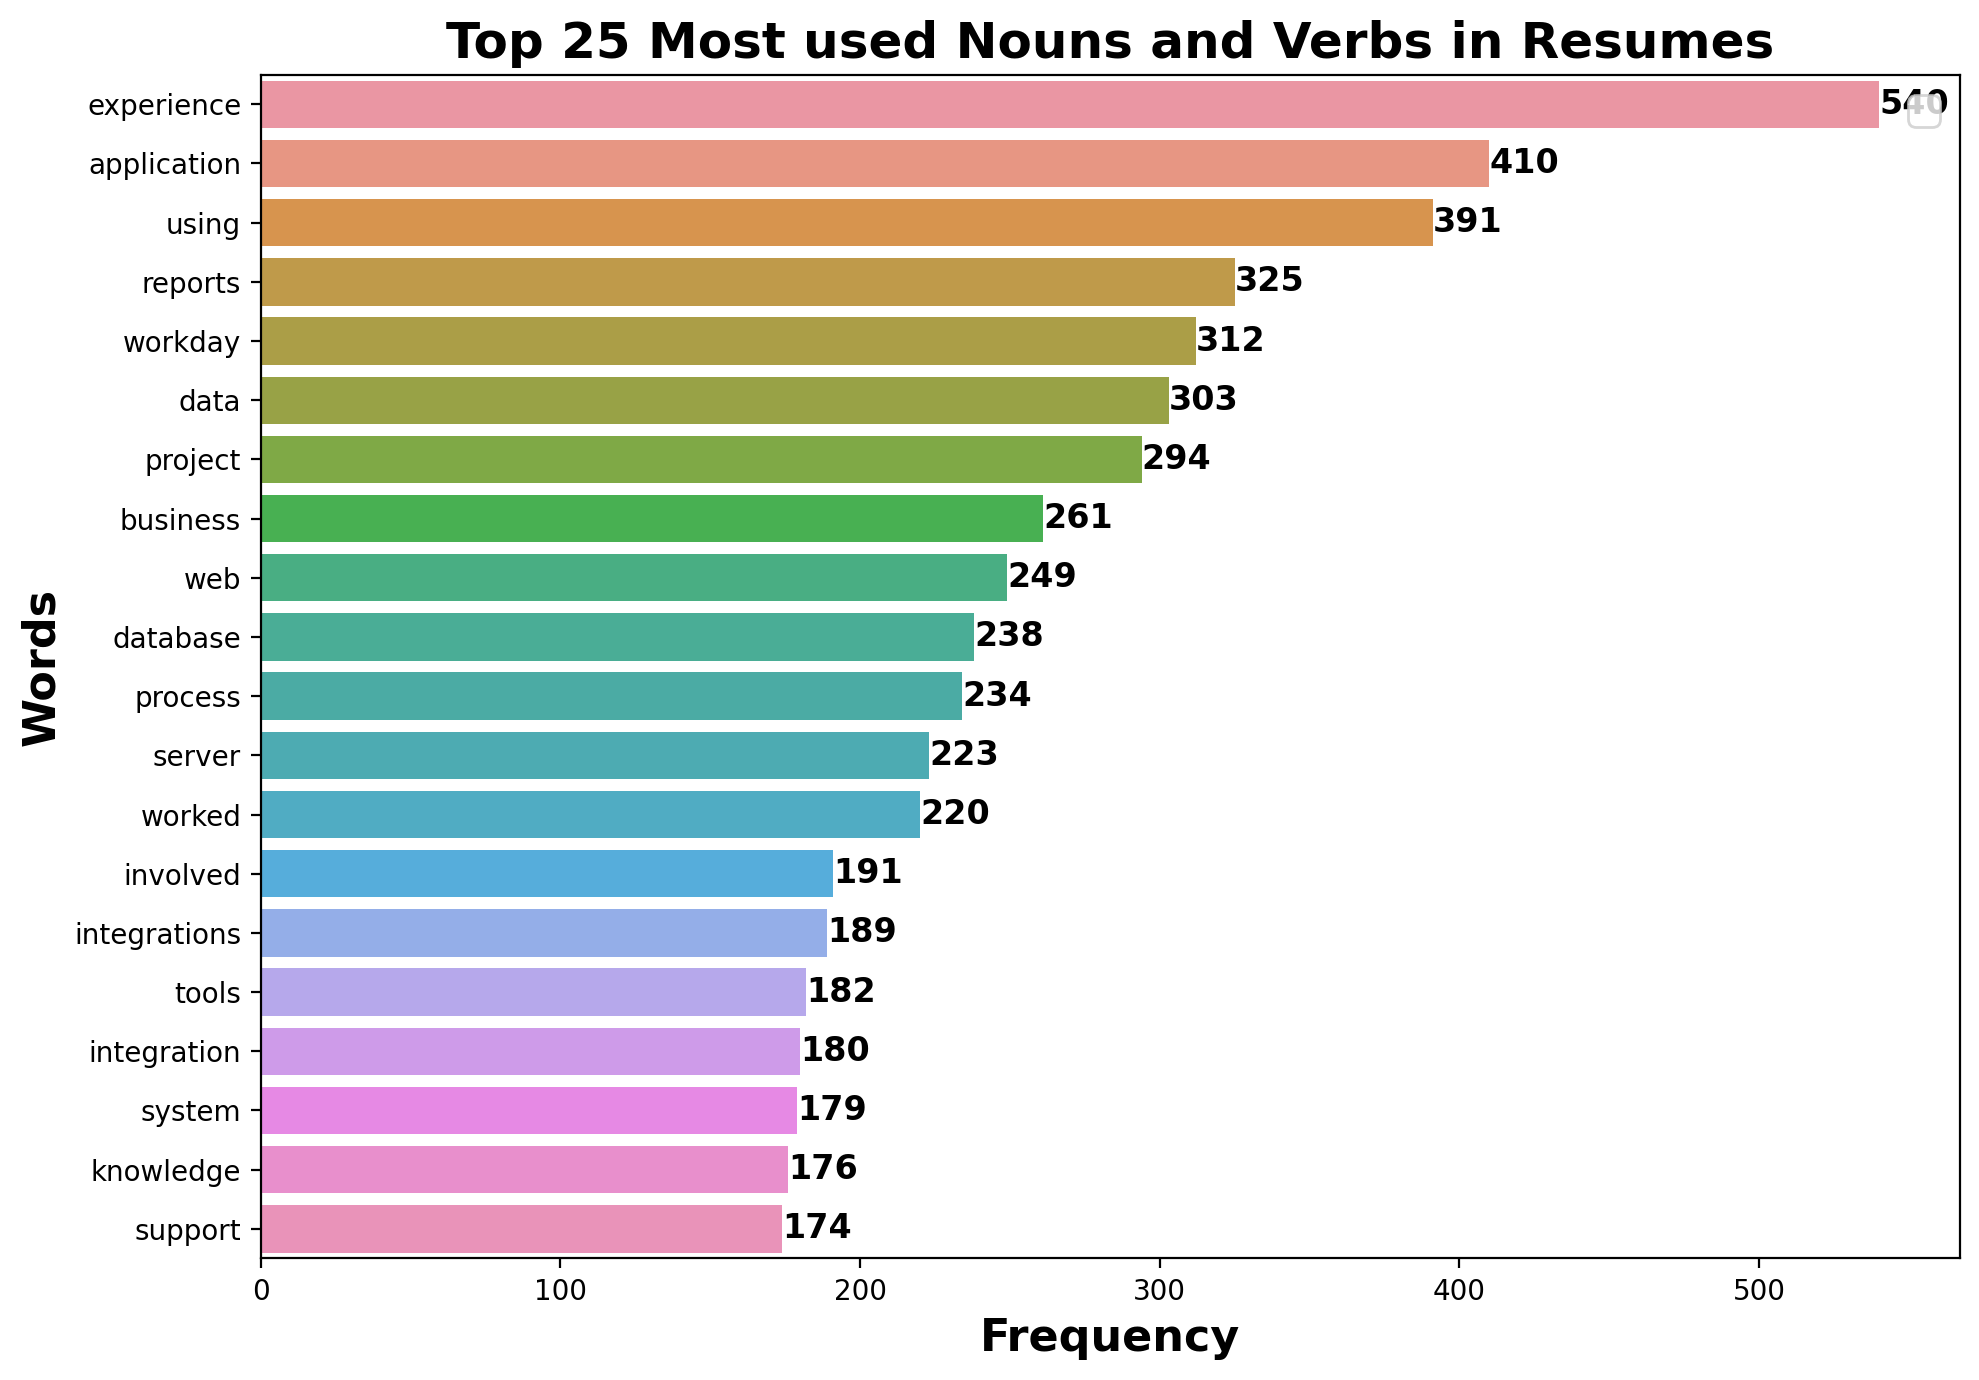

In [25]:
from matplotlib import pylab

fig, axe = plt.subplots(1,1, figsize=(10,7), dpi=200)
ax = sns.barplot(x= wd_df['Count'].head(20), y= wd_df.Words.head(20), data= wd_df, ax = axe,)
            #label= 'Total Pofile Category : {}'.format(len(resume_data.Category.unique())))

axe.set_xlabel('Frequency', size=16,fontweight= 'bold')
axe.set_ylabel('Words', size=16, fontweight= 'bold')
plt.xticks(rotation = 0)
plt.legend(loc='best', fontsize= 'x-large')
plt.title('Top 25 Most used Nouns and Verbs in Resumes', fontsize= 18, fontweight= 'bold')
rcParams = {'xtick.labelsize':'14','ytick.labelsize':'14','axes.labelsize':'16'}

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

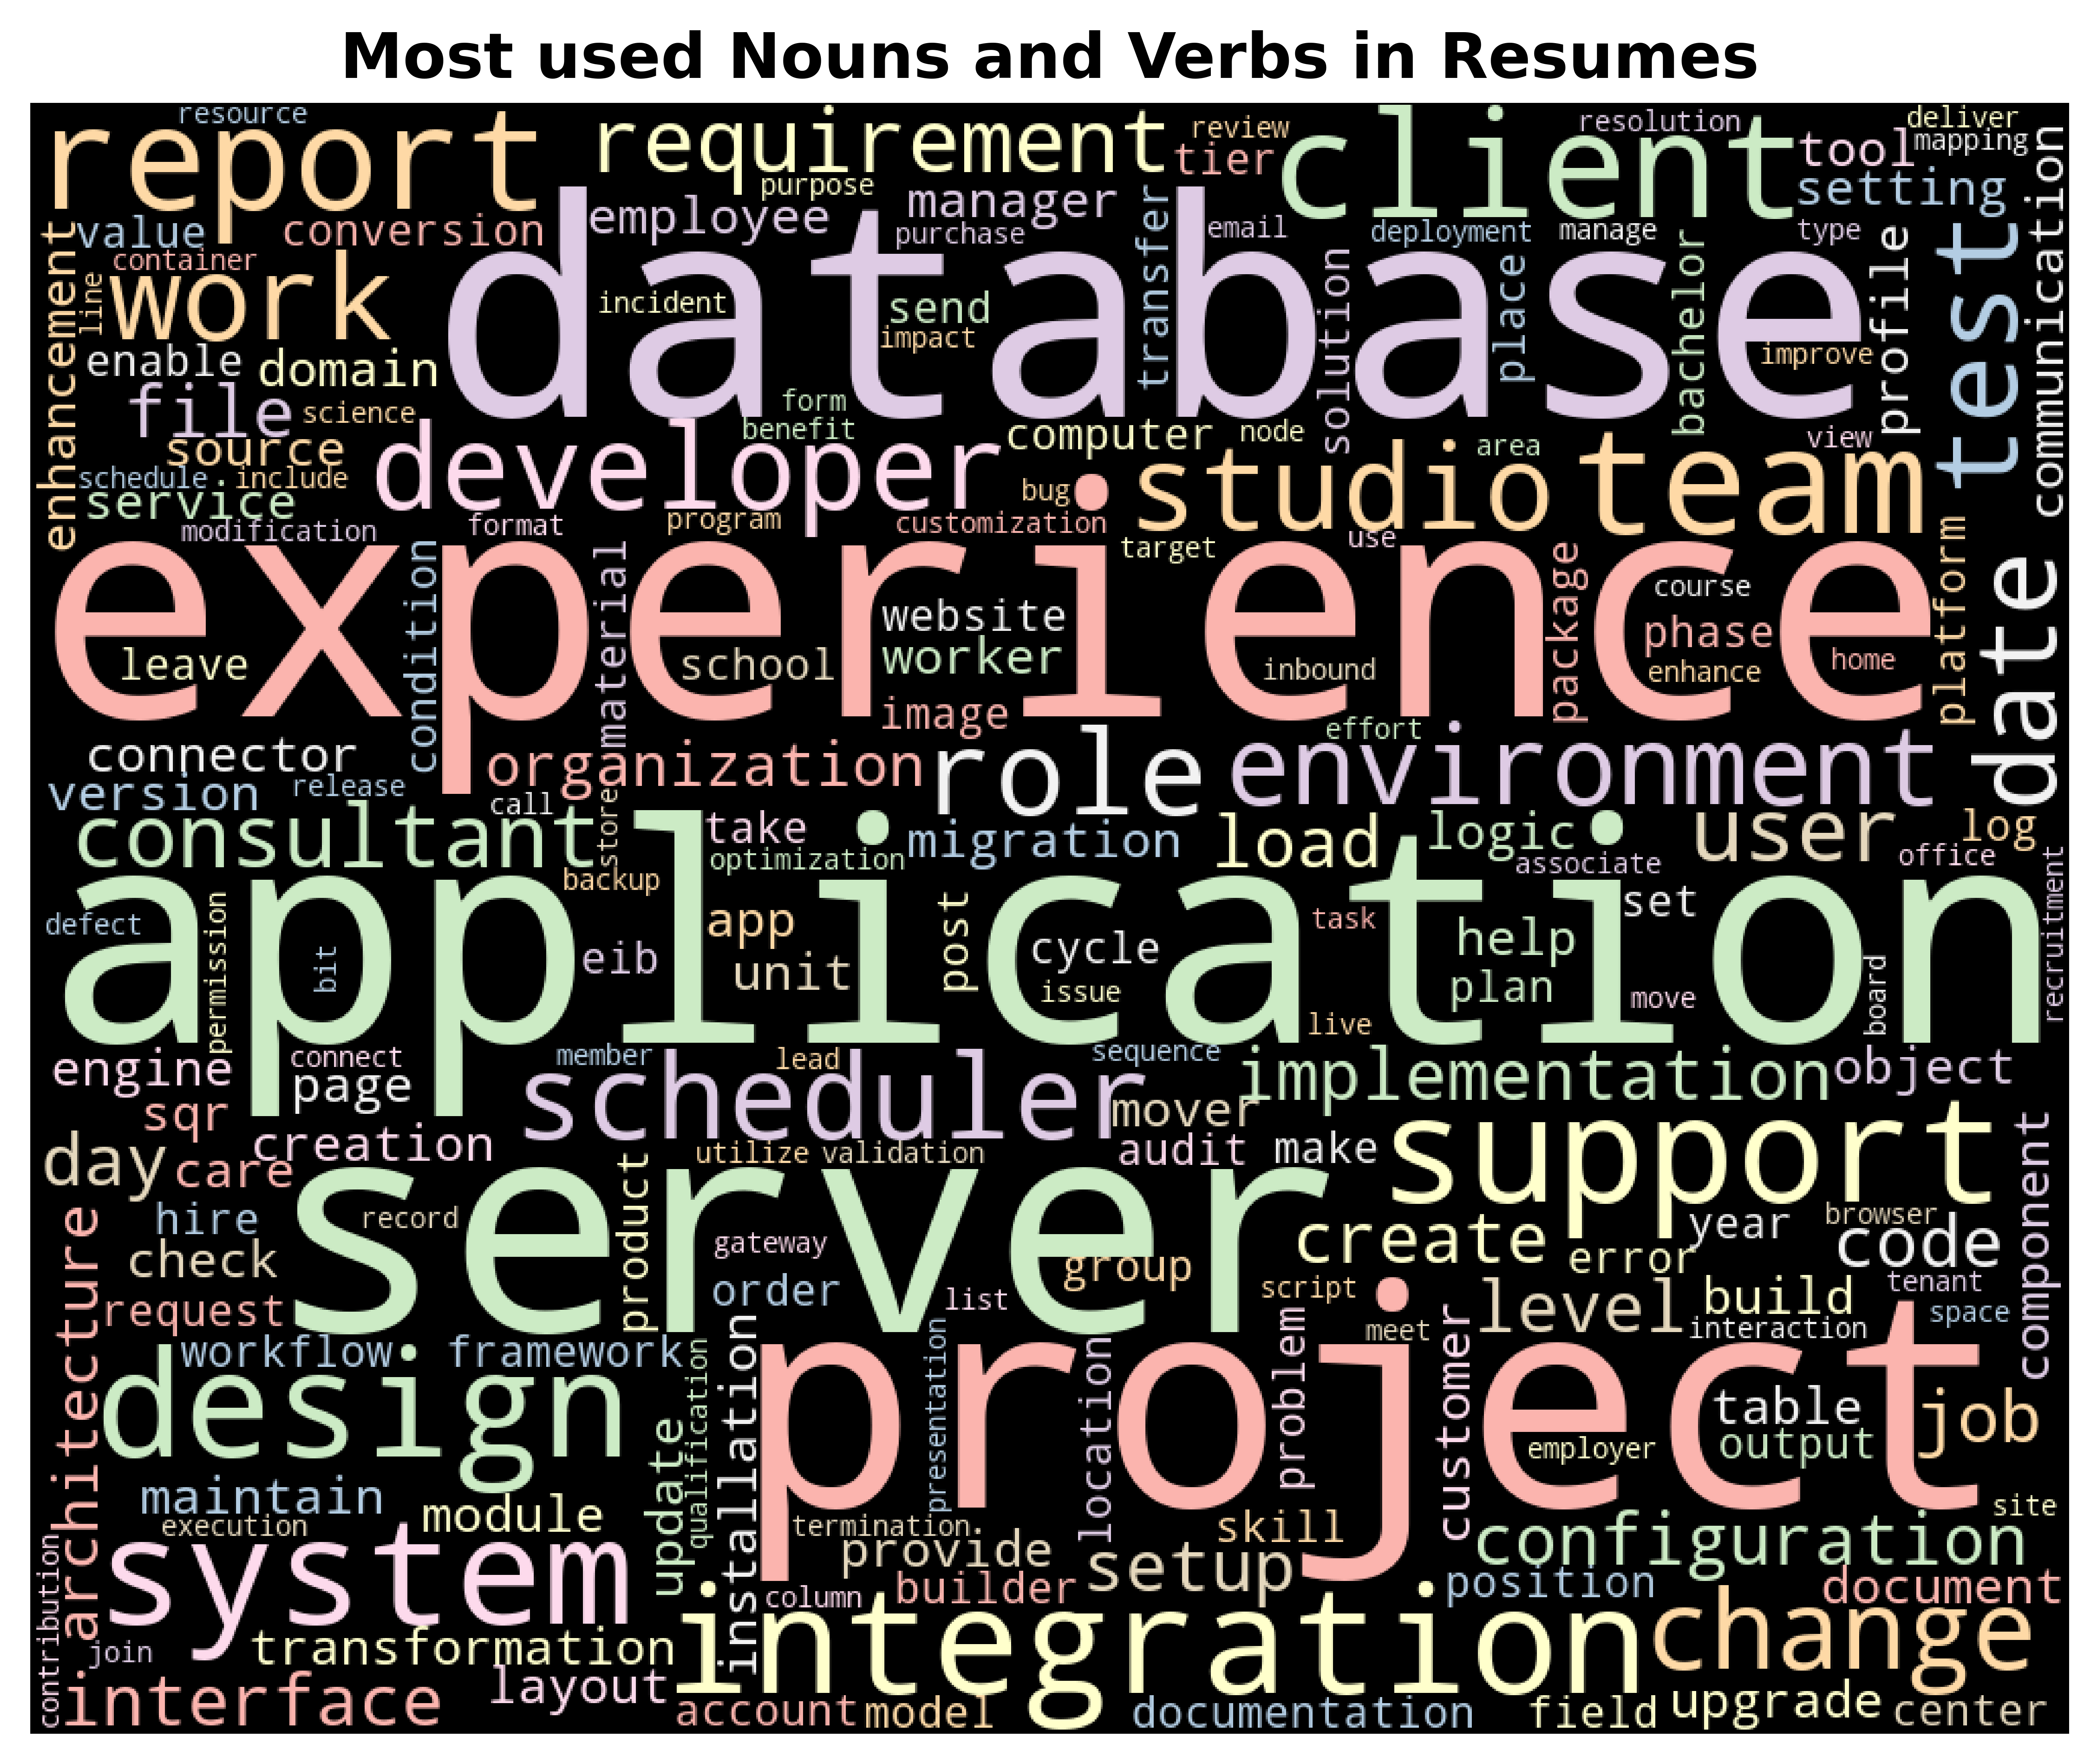

In [26]:
from wordcloud import WordCloud, STOPWORDS

text = " ".join(cat for cat in wd_df.Words) # Creating the text variable

word_cloud = WordCloud(width=1000, height=800, random_state=10, background_color="black", 
                       colormap="Pastel1", collocations=False, stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(10,7), dpi=800) # Display the generated Word Cloud
plt.title('Most used Nouns and Verbs in Resumes', fontsize= 15, fontweight= 'bold')
plt.imshow(word_cloud)
plt.axis("off")

plt.show()

In [27]:
df.shape

(79, 3)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Category        79 non-null     object
 1   File Name       79 non-null     object
 2   Resume_Details  78 non-null     object
dtypes: object(3)
memory usage: 2.0+ KB


In [29]:
df.isnull().sum()

Category          0
File Name         0
Resume_Details    1
dtype: int64

In [30]:
df.describe()

,Category,File Name,Resume_Details
count,79,79,78
unique,4,79,76
top,React JS Developer,Peoplesoft Admin_AnubhavSingh.docx,developer react developer name krishna profess...
freq,24,1,2


In [31]:
df.columns

Index(['Category', 'File Name', 'Resume_Details'], dtype='object')

In [32]:
df.dtypes

Category          object
File Name         object
Resume_Details    object
dtype: object

## EDA process

In [33]:
file_path   = r'Resumes/'
doc_file    = []
pdf_file    = []
docx_file   = []
folder_name = []

for folder in os.listdir(file_path):
    folder_path = file_path+folder
    for file in os.listdir(folder_path):
        if file.endswith('.doc'):
            doc_file.append(file)
            folder_name.append(folder)
        elif file.endswith('.docx'):
            docx_file.append(file)
            folder_name.append(folder)
        else:
            pdf_file.append(file)
            folder_name.append(folder)

print('Number of .doc Files  = {}'.format(len(doc_file)),'\n'
      'Number of .pdf Files  = {}'.format(len(pdf_file)),'\n'
      'Number of .docx Files = {}'.format(len(docx_file)))

Number of .doc Files  = 25 
Number of .pdf Files  = 2 
Number of .docx Files = 53


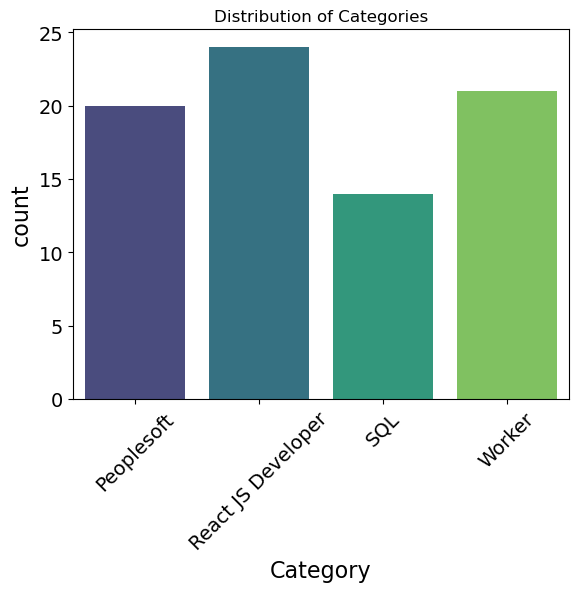

In [34]:
# 2. Distribution of 'Category'
sns.countplot(data=df, x='Category', palette='viridis')
plt.title("Distribution of Categories")
plt.xticks(rotation=45)
plt.show()

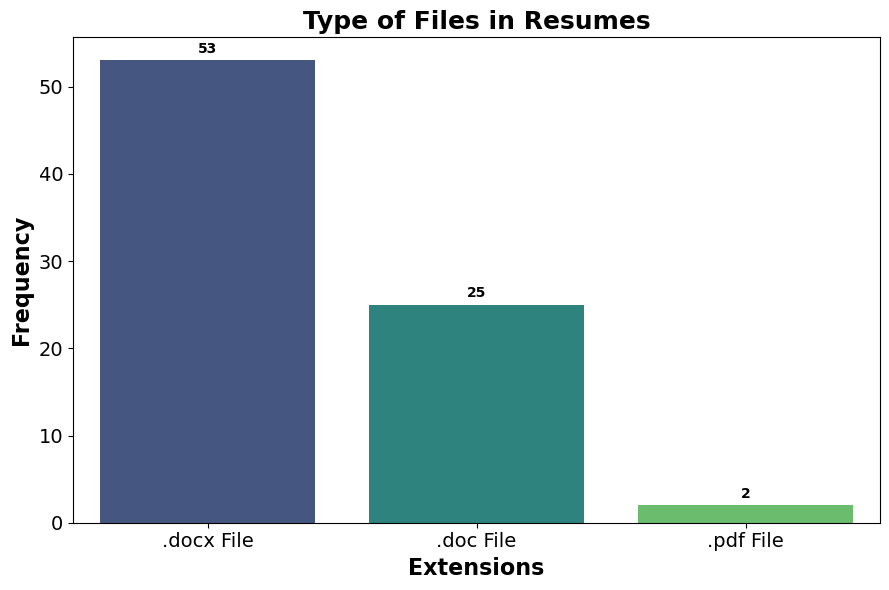

In [35]:
# Simplified code for bar plot of file types
file_types = ['.docx File', '.doc File', '.pdf File']
file_counts = [len(docx_file), len(doc_file), len(pdf_file)]

plt.figure(figsize=(9, 6), dpi=100)
sns.barplot(x=file_types, y=file_counts, palette='viridis')
plt.xlabel('Extensions', fontsize=16, fontweight='bold')
plt.ylabel('Frequency', fontsize=16, fontweight='bold')
plt.title('Type of Files in Resumes', fontsize=18, fontweight='bold')

# Annotate bars
for index, value in enumerate(file_counts):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom', color='black', fontweight='bold')

plt.tight_layout()
plt.show()

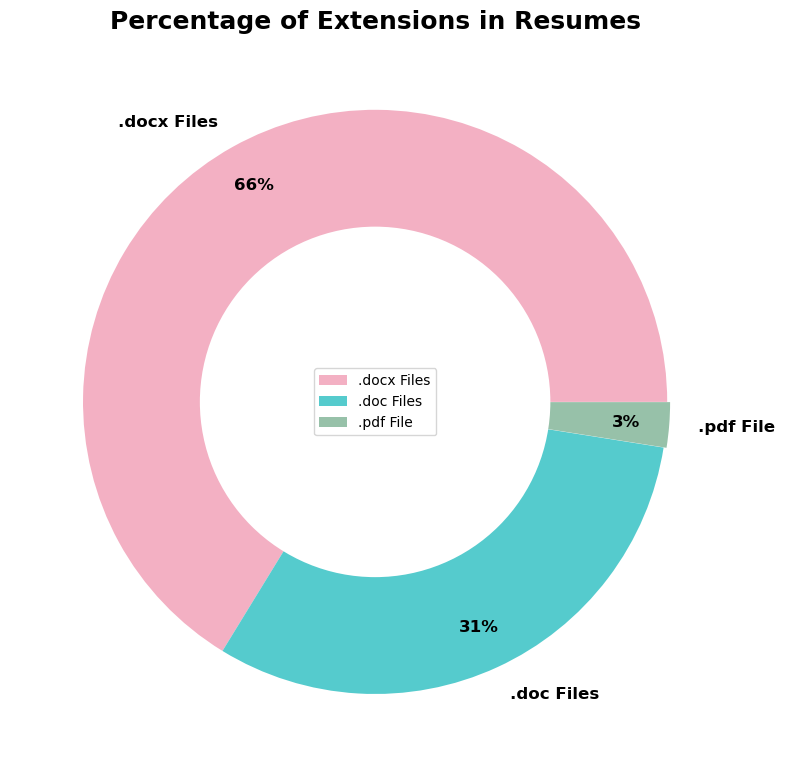

In [36]:
# pie chart view
sizes = [len(docx_file), len(doc_file), len(pdf_file)]
labels = ['.docx Files', '.doc Files', '.pdf File']
colors = ['#F3B0C3', '#55CBCD', '#97C1A9']
explode = (0.00, 0.00, 0.01)

plt.figure(figsize=(8, 8), dpi=100)
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.0f%%', pctdistance=0.85, 
        explode=explode, startangle=0, textprops={'size': 'large', 'fontweight': 'bold'})

# Add a circle at the center to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
plt.gca().add_artist(centre_circle)

plt.title('Percentage of Extensions in Resumes', fontsize=18, fontweight='bold')
plt.legend(labels, loc="center")
plt.tight_layout()
plt.show()

In [37]:
file_path = r'Resumes/'
file_name = []
profile   = []
            
for folder in os.listdir(file_path):
    folder_path = file_path+folder
    for file in os.listdir(folder_path):
        if file.endswith('.doc'):
            profile.append(folder)
            file_name.append(file)
        elif file.endswith('.docx'):
            profile.append(folder)
            file_name.append(file)
        else:
            profile.append(folder)
            file_name.append(file)
df = pd.DataFrame()
df['Profile'] = profile
df['Resumes'] = file_name
df

,Profile,Resumes
0,Peoplesoft resumes,Peoplesoft Admin_AnubhavSingh.docx
1,Peoplesoft resumes,Peoplesoft Admin_G Ananda Rayudu.doc
2,Peoplesoft resumes,Peoplesoft Admin_Gangareddy.doc
3,Peoplesoft resumes,Peoplesoft Admin_Murali.docx
4,Peoplesoft resumes,Peoplesoft Admin_Priyanka Ramadoss.doc
...,...,...
75,workday resumes,Sri Krishna S_Hexaware.doc
76,workday resumes,Srikanth-Hexaware.docx
77,workday resumes,SSKumar_Hexaware.docx
78,workday resumes,Venkateswarlu B_Hexaware.doc


In [38]:
df.Profile.value_counts()

React js developer                 24
workday resumes                    22
Peoplesoft resumes                 20
SQL Developer Lightning insight    14
Name: Profile, dtype: int64

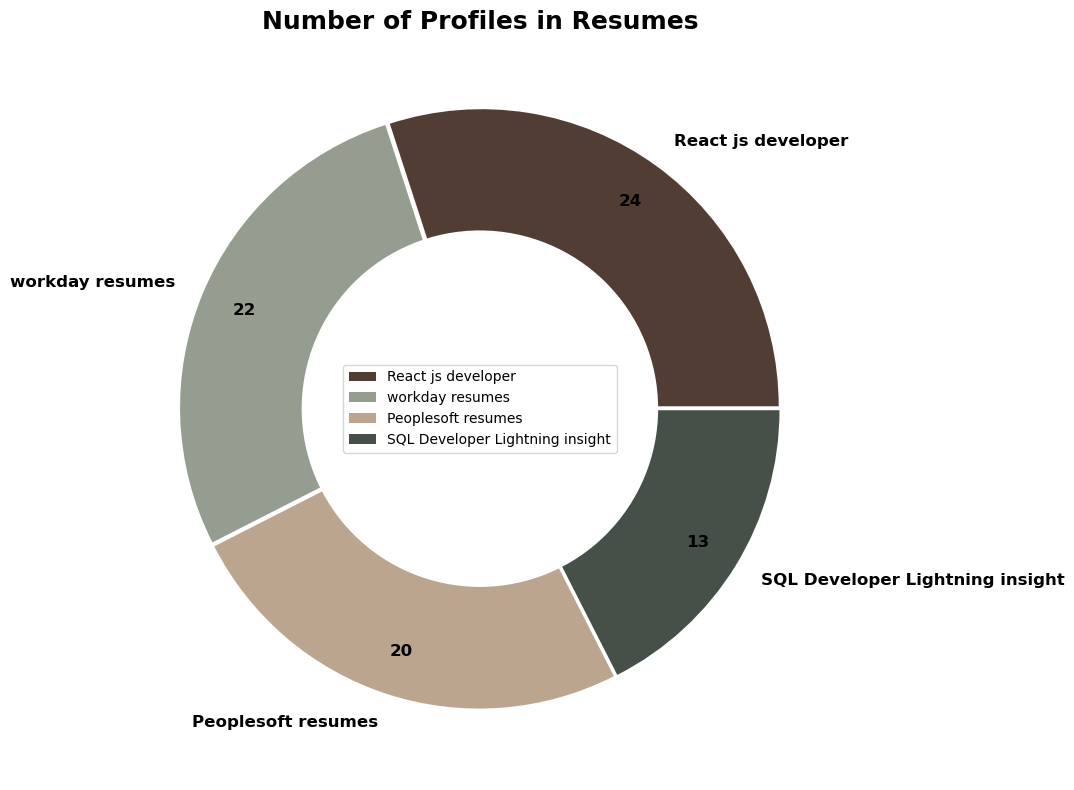

In [39]:
sizes = df['Profile'].value_counts()
labels = sizes.index
colors = ['#523D35', '#959D90', '#BBA58F', '#465048']
explode = [0.01] * len(labels)

plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct=lambda x: f'{int(x * sizes.sum() / 100)}', 
        pctdistance=0.85, explode=explode, startangle=0, textprops={'size': 'large', 'fontweight': 'bold'})

# Add a circle at the center to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
plt.gca().add_artist(centre_circle)

plt.title('Number of Profiles in Resumes', fontsize=18, fontweight='bold')
plt.legend(labels, loc="center")
plt.tight_layout()
plt.show()

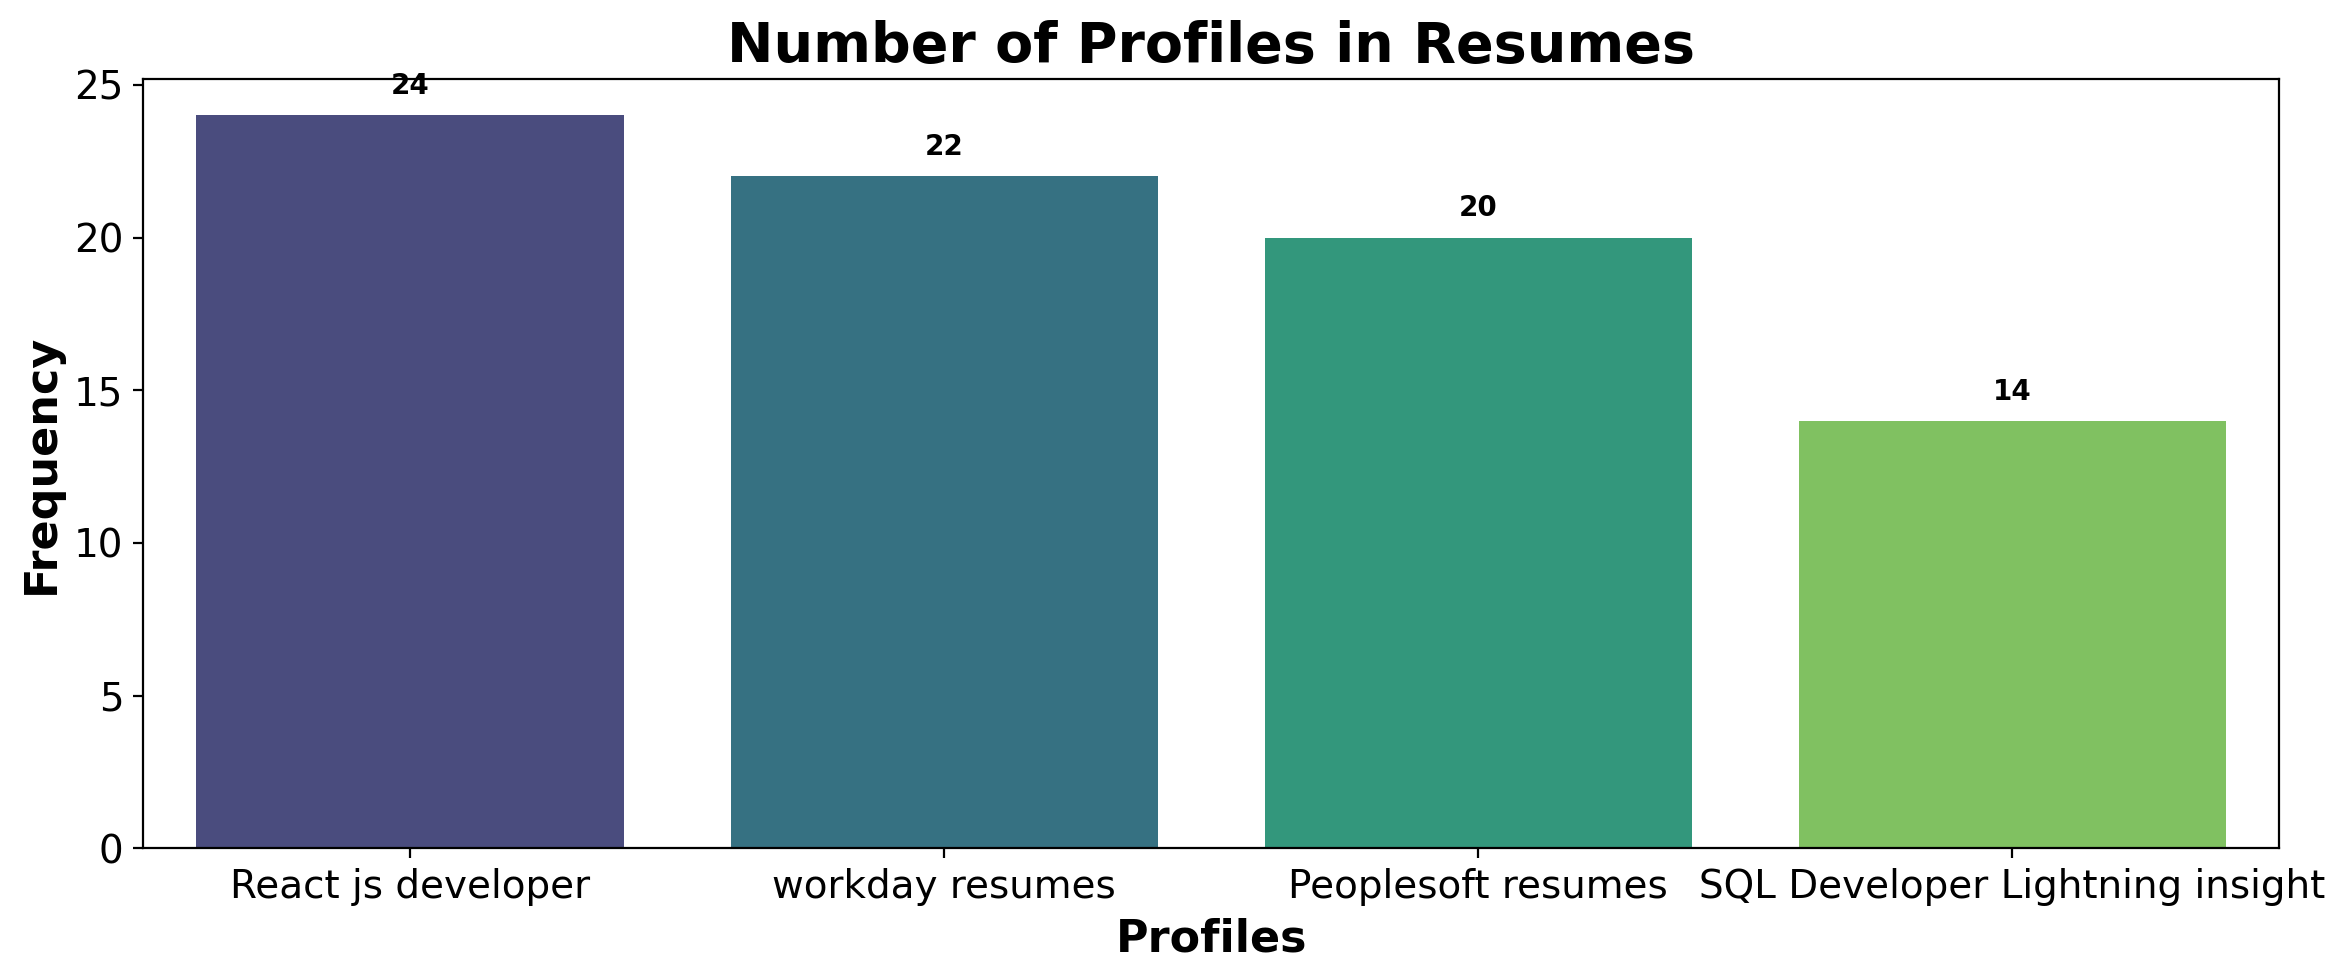

In [40]:
# bar chart of profiles
plt.figure(figsize=(12, 5), dpi=200)
sns.barplot(x=df['Profile'].value_counts().index, 
            y=df['Profile'].value_counts(), 
            palette='viridis')
plt.xlabel('Profiles', fontsize=16, fontweight='bold')
plt.ylabel('Frequency', fontsize=16, fontweight='bold')
plt.title('Number of Profiles in Resumes', fontsize=20, fontweight='bold')

# Annotate bars
for index, value in enumerate(df['Profile'].value_counts()):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom', color='black', fontweight='bold')

plt.tight_layout()
plt.show()


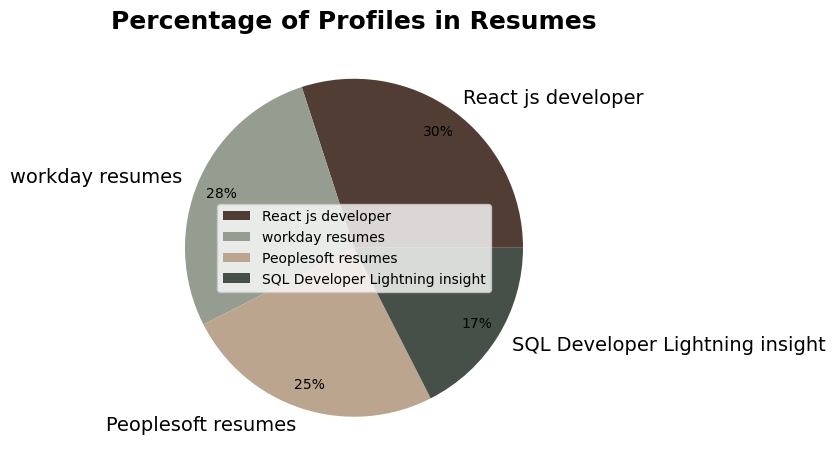

In [41]:

plt.figure(figsize=(8, 8), dpi=100)
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.0f%%', pctdistance=0.85) 
colors = ['#F3B0C3', '#55CBCD', '#97C1A9', '#465048']
explode = [0.01] * len(labels)
plt.title('Percentage of Profiles in Resumes', fontsize=18, fontweight='bold')
plt.legend(labels, loc="center")
plt.tight_layout()
plt.show()

Text Length Statistics:
 count    80.000000
mean     32.162500
std      12.653557
min      12.000000
25%      24.000000
50%      30.000000
75%      36.000000
max      65.000000
Name: Text Length, dtype: float64


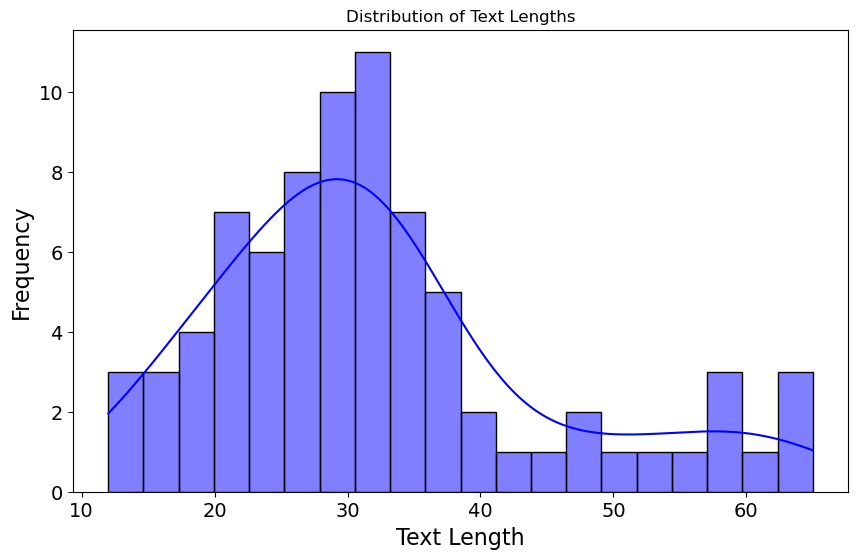

In [42]:
# 3. Analyze text length
# Add a column for text length
df['Text Length'] = df['Resumes'].apply(len)

# Summary statistics for text length
print("Text Length Statistics:\n", df['Text Length'].describe())

# Plot text length distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Text Length'], kde=True, color='blue', bins=20)
plt.title("Distribution of Text Lengths")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.show()

In [43]:
def extract_text_from_docx(docx_path):
    txt = docx2txt.process(docx_path)
    if txt:
        return txt.replace('\t', ' ')
    return None
 
print(extract_text_from_docx('Resumes\React JS Developer\React Developer_Haripriya.docx'))


HARIPRIYA BATTINA 

Experience as UI Developer in Reactjs, JavaScript. 

Phone: +91 9908576950 

Gmail: haripriyabattini@gmai.com 

Location: Visakhapatnam 

JOB OBJECTIVE ● Looking for a challenging role to put my experience in various aspects of technology with an objective to be a leading source of information and guidance concerning th

technological requirements. 

● Want to be a part of a reputed organization that allows me to effectively use my 

technical skills in the real world for overall growth of organization and my 

professional career. 

WORK EXPERIENCE EDUCATION 

1. Associate UI Developr 

Company: Blue Yonder, Hyderabad. 

● Work Done On “COPERNICUS” Project. 

● The Main Moto of this project is, it is GTM (Go To Market) Portal which is specially designed for demo teams to shower case Blue Yonder Products and Features for Customers and Partners 

● Technologies: HTML, CSS, React JS. 

● IDE: VS Code. 

● Methodologies: Agile. 

JOB RESPONSIBILITIES: 

● Involved Desi

In [44]:
df = pd.read_csv('Cleaned_Resumes.csv')
df

,Category,File Name,Resume_Details
0,Peoplesoft,Peoplesoft Admin_AnubhavSingh.docx,anubhav kumar singh core competencies scriptin...
1,Peoplesoft,Peoplesoft Admin_G Ananda Rayudu.doc,profile summary years experience implementing ...
2,Peoplesoft,Peoplesoft Admin_Gangareddy.doc,peoplesoft database administrator gangareddy p...
3,Peoplesoft,Peoplesoft Admin_Murali.docx,classification internal classification interna...
4,Peoplesoft,Peoplesoft Admin_Priyanka Ramadoss.doc,priyanka ramadoss mountpleasant coonoor nilgir...
...,...,...,...
74,Worker,Sri Krishna S_Hexaware.doc,workday integration consultant name sri krishn...
75,Worker,Srikanth-Hexaware.docx,srikanth workday hcm consultant seeking suitab...
76,Worker,SSKumar_Hexaware.docx,workday hcm fcm name kumar role workday consul...
77,Worker,Venkateswarlu B_Hexaware.doc,venkateswarlu workday consultant years experie...


## Importing Dataset

In [45]:
df = pd.read_csv('Cleaned_Resumes.csv')
df.head()

,Category,File Name,Resume_Details
0,Peoplesoft,Peoplesoft Admin_AnubhavSingh.docx,anubhav kumar singh core competencies scriptin...
1,Peoplesoft,Peoplesoft Admin_G Ananda Rayudu.doc,profile summary years experience implementing ...
2,Peoplesoft,Peoplesoft Admin_Gangareddy.doc,peoplesoft database administrator gangareddy p...
3,Peoplesoft,Peoplesoft Admin_Murali.docx,classification internal classification interna...
4,Peoplesoft,Peoplesoft Admin_Priyanka Ramadoss.doc,priyanka ramadoss mountpleasant coonoor nilgir...


In [46]:
from sklearn.preprocessing import LabelEncoder
Encoder=LabelEncoder()
df["LebelEncoding"]=Encoder.fit_transform(df ["Category"])

df

,Category,File Name,Resume_Details,LebelEncoding
0,Peoplesoft,Peoplesoft Admin_AnubhavSingh.docx,anubhav kumar singh core competencies scriptin...,0
1,Peoplesoft,Peoplesoft Admin_G Ananda Rayudu.doc,profile summary years experience implementing ...,0
2,Peoplesoft,Peoplesoft Admin_Gangareddy.doc,peoplesoft database administrator gangareddy p...,0
3,Peoplesoft,Peoplesoft Admin_Murali.docx,classification internal classification interna...,0
4,Peoplesoft,Peoplesoft Admin_Priyanka Ramadoss.doc,priyanka ramadoss mountpleasant coonoor nilgir...,0
...,...,...,...,...
74,Worker,Sri Krishna S_Hexaware.doc,workday integration consultant name sri krishn...,3
75,Worker,Srikanth-Hexaware.docx,srikanth workday hcm consultant seeking suitab...,3
76,Worker,SSKumar_Hexaware.docx,workday hcm fcm name kumar role workday consul...,3
77,Worker,Venkateswarlu B_Hexaware.doc,venkateswarlu workday consultant years experie...,3


In [47]:
df.describe()

,LebelEncoding
count,79.000000
mean,1.455696
std,1.141271
min,0.000000
25%,0.500000
50%,1.000000
75%,3.000000
max,3.000000


In [48]:
df.isnull().sum()

Category          0
File Name         0
Resume_Details    1
LebelEncoding     0
dtype: int64

In [49]:
# Remove rows with NaN values
df = df.dropna()

# Verify that there are no more NaN values
print("Missing Values After Removal:\n", df.isnull().sum())

Missing Values After Removal:
 Category          0
File Name         0
Resume_Details    0
LebelEncoding     0
dtype: int64


In [50]:
df.shape


(78, 4)

## Model Building

In [51]:
x = df['Resume_Details'].values
y = df['Category'].values

In [52]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=45, test_size=0.25,stratify=y)
x_train.shape, x_test.shape

((58,), (20,))

In [53]:
# Convert text data to numerical data using TF-IDF vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vector = TfidfVectorizer(sublinear_tf=True,stop_words='english')

x_train = tfidf_vector.fit_transform(x_train)
x_test = tfidf_vector.transform(x_test)

In [54]:
x_train.shape, x_test.shape

((58, 3522), (20, 3522))

In [55]:
print(y_train),print(y_test)

['Peoplesoft' 'React JS Developer' 'Worker' 'React JS Developer'
 'React JS Developer' 'Peoplesoft' 'React JS Developer' 'Peoplesoft'
 'Peoplesoft' 'React JS Developer' 'React JS Developer' 'SQL'
 'React JS Developer' 'Worker' 'SQL' 'Worker' 'React JS Developer'
 'Peoplesoft' 'SQL' 'React JS Developer' 'SQL' 'Peoplesoft' 'Peoplesoft'
 'Peoplesoft' 'SQL' 'Worker' 'Worker' 'SQL' 'React JS Developer' 'Worker'
 'React JS Developer' 'SQL' 'Worker' 'React JS Developer' 'Worker' 'SQL'
 'Worker' 'Peoplesoft' 'Peoplesoft' 'SQL' 'Peoplesoft' 'Worker' 'SQL'
 'Peoplesoft' 'Worker' 'Peoplesoft' 'Worker' 'Worker' 'Worker' 'Worker'
 'Peoplesoft' 'React JS Developer' 'React JS Developer'
 'React JS Developer' 'Peoplesoft' 'React JS Developer'
 'React JS Developer' 'Worker']
['Peoplesoft' 'SQL' 'React JS Developer' 'SQL' 'React JS Developer'
 'Worker' 'React JS Developer' 'Peoplesoft' 'React JS Developer' 'Worker'
 'Peoplesoft' 'SQL' 'SQL' 'Worker' 'Peoplesoft' 'Peoplesoft'
 'React JS Developer' 'Worke

(None, None)

In [56]:
# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

## Support Vectore Machine (SVM) Classifier

Train Accuracy: 1.0
Test Accuracy: 1.0

Classification Report on Test Data:
                    precision    recall  f1-score   support

        Peoplesoft       1.00      1.00      1.00         5
React JS Developer       1.00      1.00      1.00         6
               SQL       1.00      1.00      1.00         4
            Worker       1.00      1.00      1.00         5

          accuracy                           1.00        20
         macro avg       1.00      1.00      1.00        20
      weighted avg       1.00      1.00      1.00        20



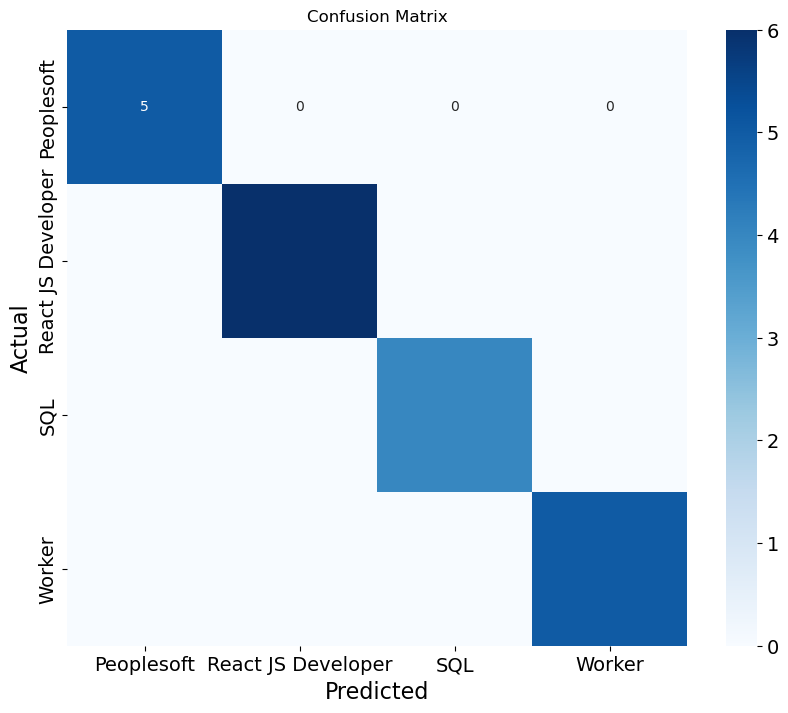

In [57]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

# Train an SVM classifier
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(x_train, y_train)


# Make predictions on the test set
y_test_pred = svm_model.predict(x_test)
y_train_pred = svm_model.predict(x_train)

# Evaluate the model's performance
test_accuracy = accuracy_score(y_test, y_test_pred)
train_accuracy = accuracy_score(y_train, y_train_pred)
report = classification_report(y_test, y_test_pred, target_names=label_encoder.classes_)
conf_matrix = confusion_matrix(y_test, y_test_pred)


print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print("\nClassification Report on Test Data:")
print(report)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Randome Forest

Train Accuracy: 1.0
Test Accuracy: 1.0

Classification Report on Test Data:
                    precision    recall  f1-score   support

        Peoplesoft       1.00      1.00      1.00         5
React JS Developer       1.00      1.00      1.00         6
               SQL       1.00      1.00      1.00         4
            Worker       1.00      1.00      1.00         5

          accuracy                           1.00        20
         macro avg       1.00      1.00      1.00        20
      weighted avg       1.00      1.00      1.00        20



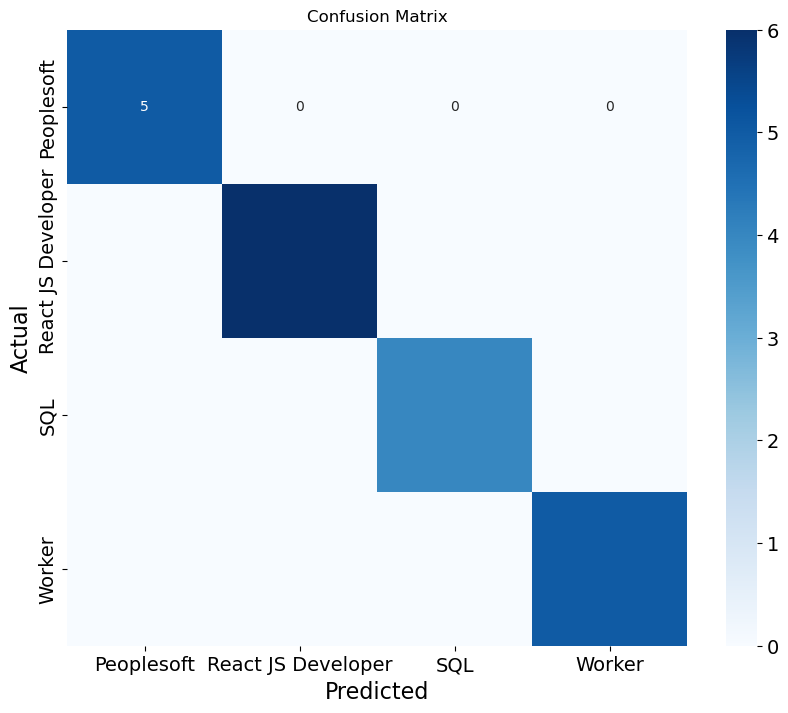

In [58]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

# Make predictions on the test set
y_test_pred = rf_model.predict(x_test)
y_train_pred = rf_model.predict(x_train)

# Evaluate the model's performance
test_accuracy = accuracy_score(y_test, y_test_pred)
train_accuracy = accuracy_score(y_train, y_train_pred)
report = classification_report(y_test, y_test_pred, target_names=label_encoder.classes_)
conf_matrix = confusion_matrix(y_test, y_test_pred)

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print("\nClassification Report on Test Data:")
print(report)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Naive Bayes

Train Accuracy: 1.0
Test Accuracy: 0.9

Classification Report on Test Data:
                    precision    recall  f1-score   support

        Peoplesoft       1.00      0.80      0.89         5
React JS Developer       1.00      1.00      1.00         6
               SQL       1.00      0.75      0.86         4
            Worker       0.71      1.00      0.83         5

          accuracy                           0.90        20
         macro avg       0.93      0.89      0.89        20
      weighted avg       0.93      0.90      0.90        20



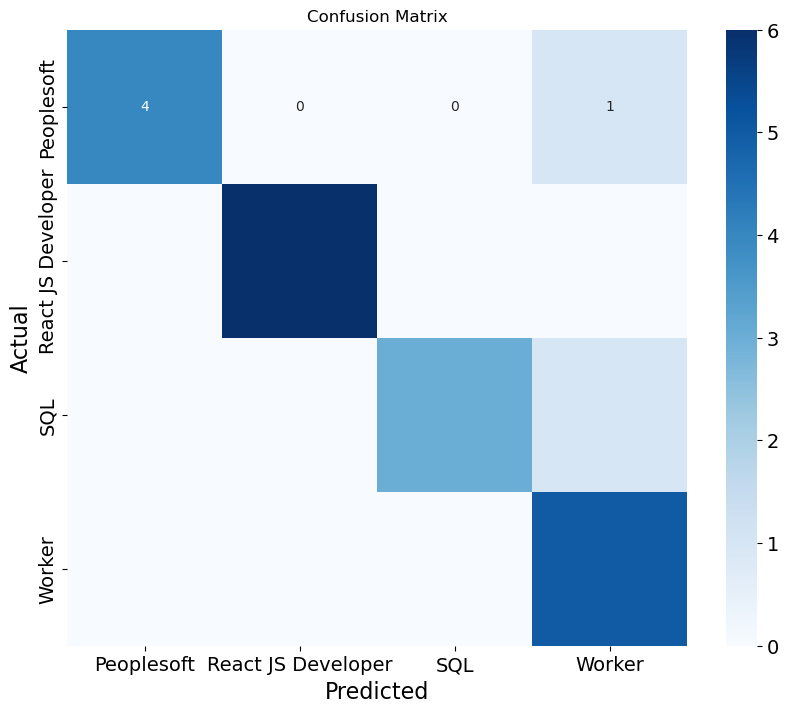

In [59]:
from sklearn.naive_bayes import MultinomialNB

# Train a Naive Bayes Classifier
nb_model = MultinomialNB()
nb_model.fit(x_train, y_train)

# Make predictions on the test set
y_test_pred = nb_model.predict(x_test)
y_train_pred = nb_model.predict(x_train)

# Evaluate the model's performance
test_accuracy = accuracy_score(y_test, y_test_pred)
train_accuracy = accuracy_score(y_train, y_train_pred)
report = classification_report(y_test, y_test_pred, target_names=label_encoder.classes_)
conf_matrix = confusion_matrix(y_test, y_test_pred)

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print("\nClassification Report on Test Data:")
print(report)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Model Evaluation

In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluation dictionary for the built models
Evaluation = {
    "Models": [
        "RandomForest Classifier", 
        "SVM Classifier", 
        "Naive Bayes Classifier"
    ],
    "Train_Accuracy(%)": [
        rf_model.score(x_train, y_train) * 100,
        svm_model.score(x_train, y_train) * 100,
        nb_model.score(x_train, y_train) * 100
    ],
    "Test_Accuracy(%)": [
        accuracy_score(y_test, rf_model.predict(x_test)) * 100,
        accuracy_score(y_test, svm_model.predict(x_test)) * 100,
        accuracy_score(y_test, nb_model.predict(x_test)) * 100
    ],
    "Precision(%)": [
        precision_score(y_test, rf_model.predict(x_test), average='weighted') * 100,
        precision_score(y_test, svm_model.predict(x_test), average='weighted') * 100,
        precision_score(y_test, nb_model.predict(x_test), average='weighted') * 100
    ],
    "Recall(%)": [
        recall_score(y_test, rf_model.predict(x_test), average='weighted') * 100,
        recall_score(y_test, svm_model.predict(x_test), average='weighted') * 100,
        recall_score(y_test, nb_model.predict(x_test), average='weighted') * 100
    ],
    "F1-Score(%)": [
        f1_score(y_test, rf_model.predict(x_test), average='weighted') * 100,
        f1_score(y_test, svm_model.predict(x_test), average='weighted') * 100,
        f1_score(y_test, nb_model.predict(x_test), average='weighted') * 100
    ]
}

# Convert the evaluation dictionary into a DataFrame
table = pd.DataFrame(Evaluation)
print(table)



                    Models  Train_Accuracy(%)  Test_Accuracy(%)  Precision(%)  \
0  RandomForest Classifier              100.0             100.0    100.000000   
1           SVM Classifier              100.0             100.0    100.000000   
2   Naive Bayes Classifier              100.0              90.0     92.857143   

   Recall(%)  F1-Score(%)  
0      100.0   100.000000  
1      100.0   100.000000  
2       90.0    90.198413  


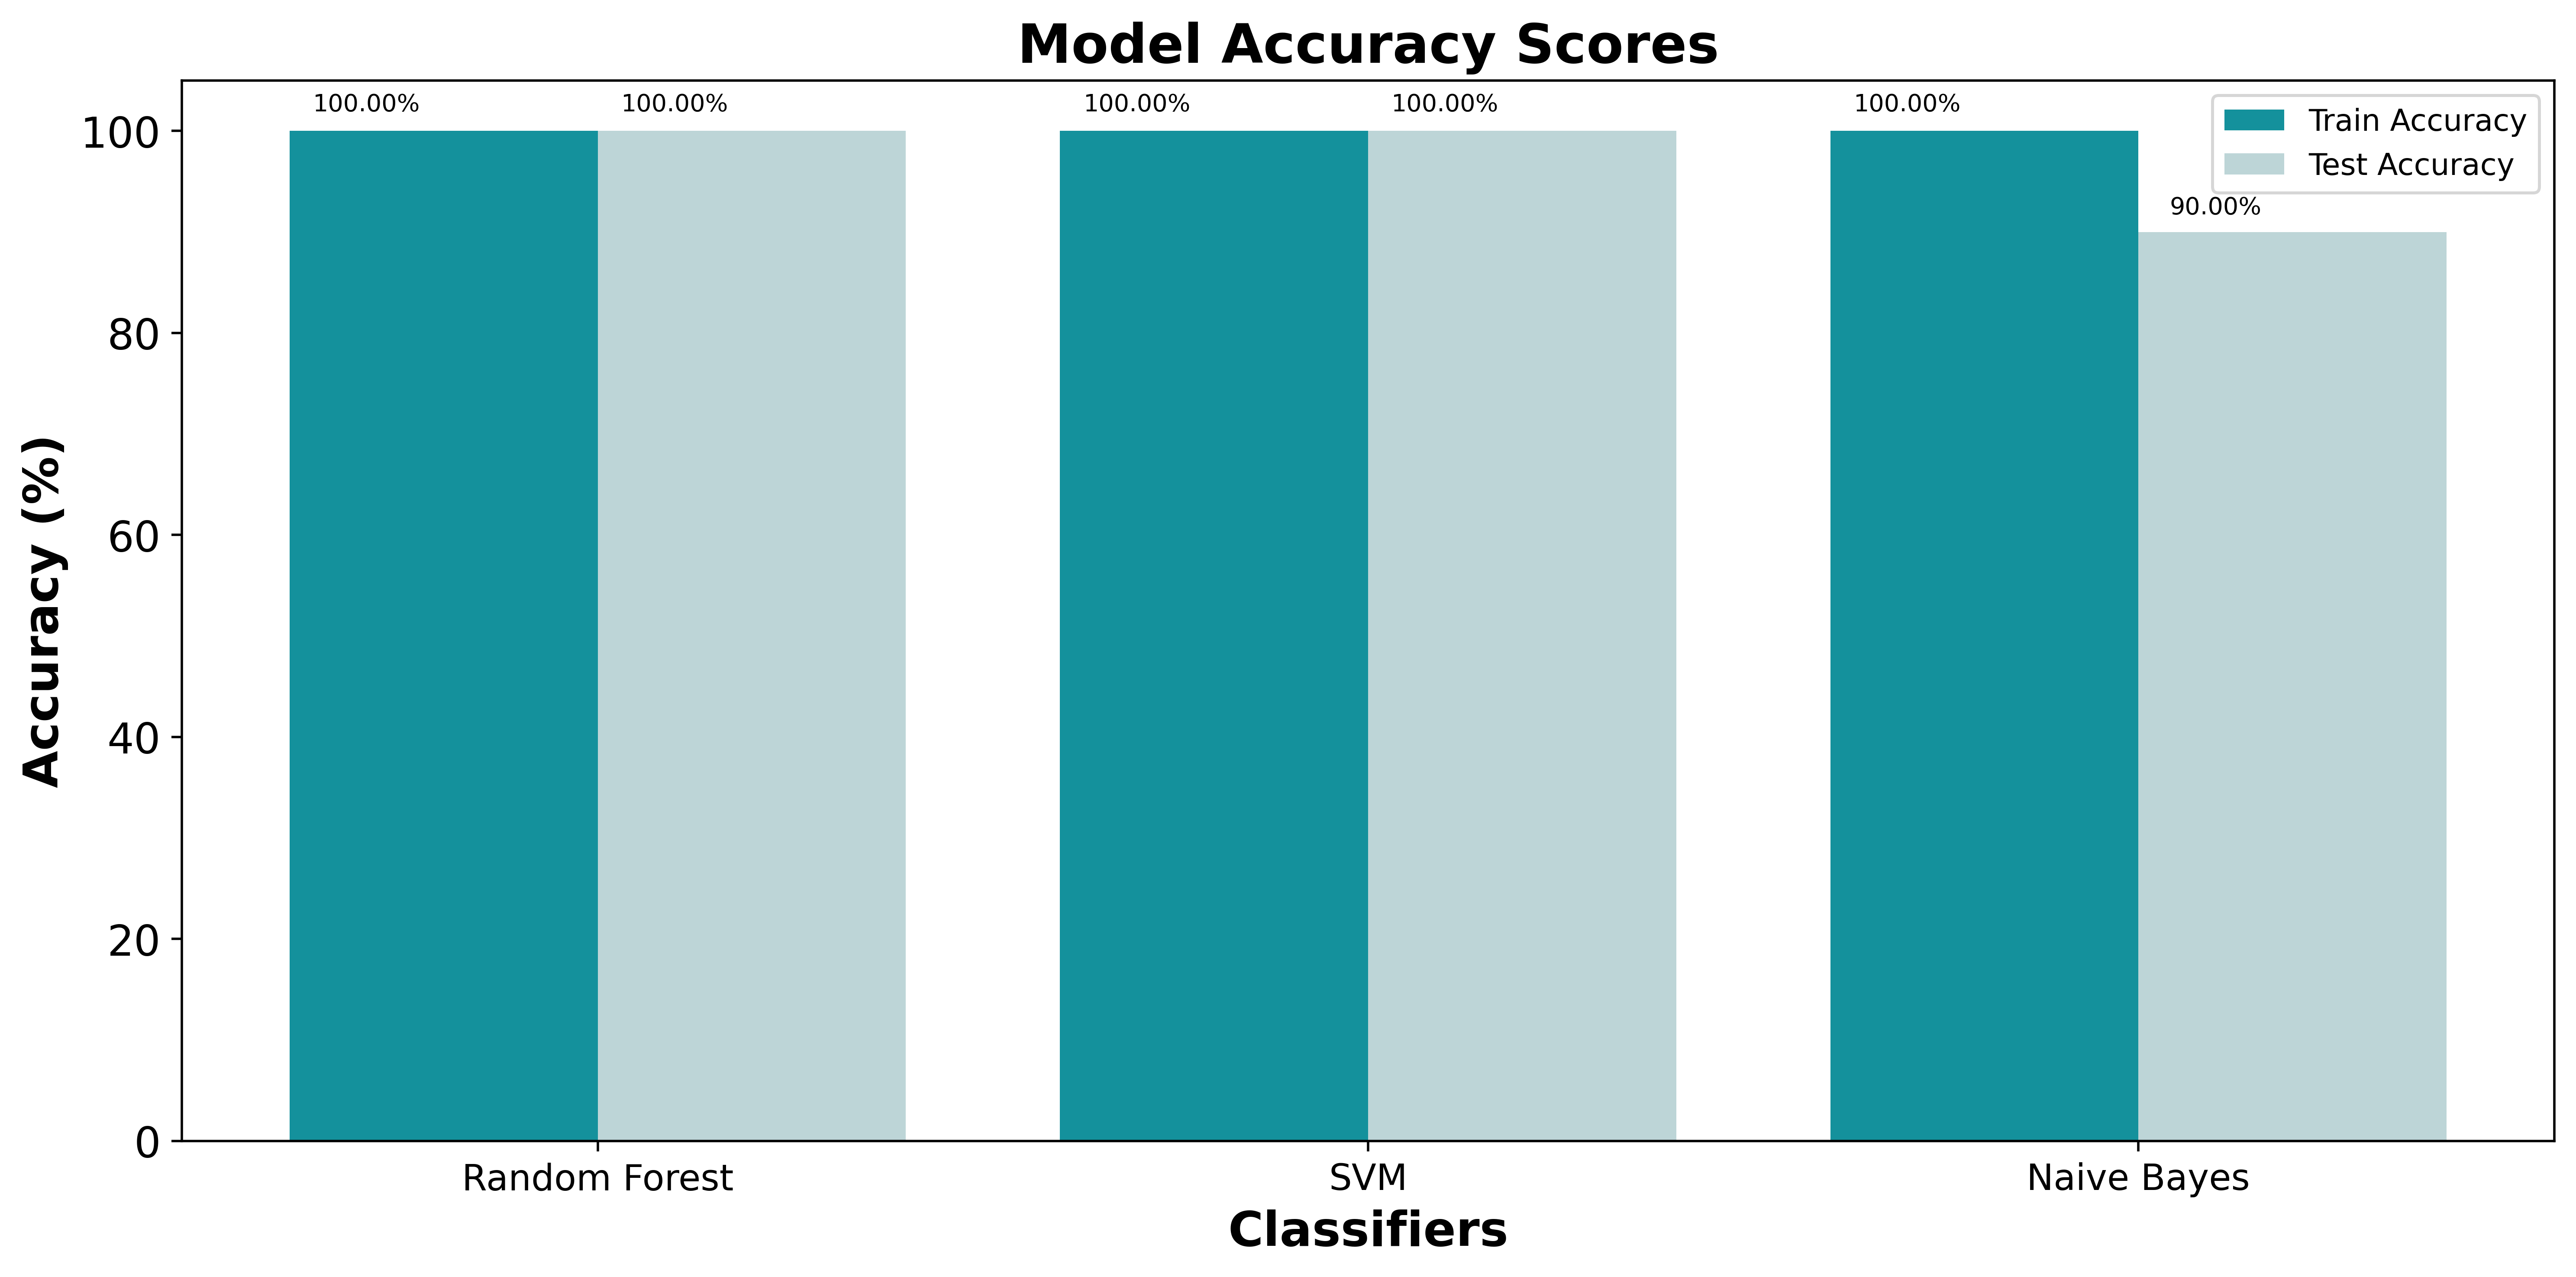

In [61]:
# Define rcParams for plot styles
rcParams = {'xtick.labelsize': '12', 'ytick.labelsize': '14', 'axes.labelsize': '16'}
pylab.rcParams.update(rcParams)

# Model names and corresponding data for the three models
model_names = ["Random Forest", "SVM", "Naive Bayes"]
train_accuracies = table['Train_Accuracy(%)']
test_accuracies = table['Test_Accuracy(%)']

# Set up the figure and axes
fig, axe = plt.subplots(1, 1, figsize=(12, 6), dpi=500)
x_pos = np.arange(len(model_names))

# Define bar colors
colors_train = ["#14919c", "#14919c", "#14919c"]  # Distinct colors for train bars
colors_test = ["#bdd5d7", "#bdd5d7", "#bdd5d7"]  # Distinct colors for test bars

# Create bar plots
bar1 = plt.bar(x_pos - 0.2, train_accuracies, width=0.4, label='Train Accuracy', color=colors_train)
bar2 = plt.bar(x_pos + 0.2, test_accuracies, width=0.4, label='Test Accuracy', color=colors_test)

# Customize x-axis ticks
plt.xticks(x_pos, model_names)

# Add labels, title, and legend
plt.xlabel("Classifiers", fontsize=16, fontweight='bold')
plt.ylabel("Accuracy (%)", fontsize=16, fontweight='bold')
plt.title("Model Accuracy Scores", fontsize=18, fontweight='bold')
plt.legend()

# Add data labels to bars
for i, bar in enumerate(bar1):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() * 1.02, 
             s=f'{train_accuracies[i]:.2f}%', fontsize=8, ha='center')

for i, bar in enumerate(bar2):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() * 1.02, 
             s=f'{test_accuracies[i]:.2f}%', fontsize=8, ha='center')

# Adjust layout and display the plot
fig.tight_layout()
plt.show()
